Sample data:
   High_school_GPA  Extracurricular_activities  Parental_income  \
0         2.749080                           3    117951.052862   
1         3.901429                           2     37533.026989   
2         3.463988                           0     21716.110183   
3         3.197317                           3     96336.442300   
4         2.312037                           5    100691.297705   

   Hours_studied_per_week  Entrance_test_performance  Distance_from_college  \
0               14.446264                  84.149103              41.129194   
1               11.027121                  72.597430              26.483084   
2               10.126133                  85.689123              40.752721   
3               11.286061                  94.983372              24.904538   
4               11.868295                  81.205077               3.358770   

   Internet_availability  Final_year_result  
0                      0                  1  
1                

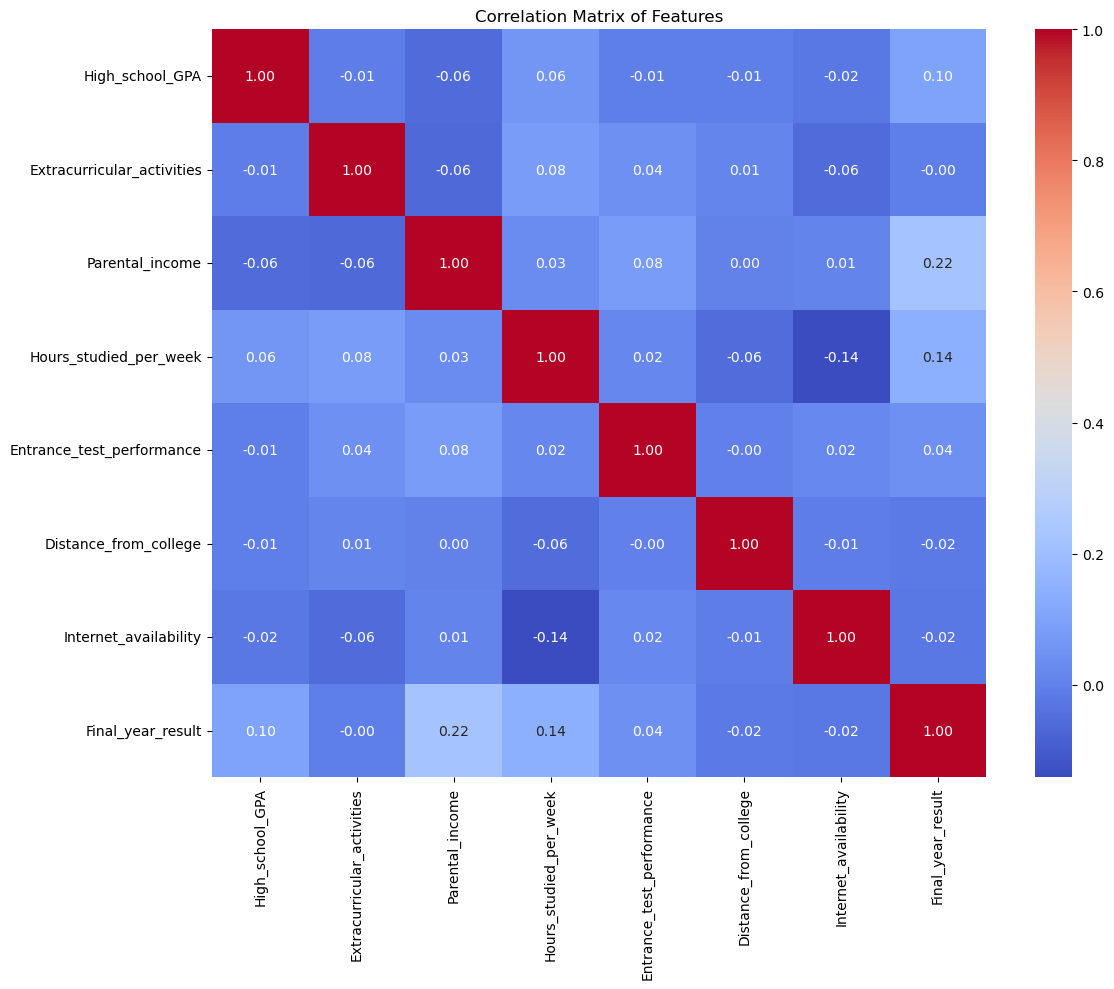


Logistic Regression Model Evaluation:
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.95      1.00      0.97        57

    accuracy                           0.95        60
   macro avg       0.47      0.50      0.49        60
weighted avg       0.90      0.95      0.93        60



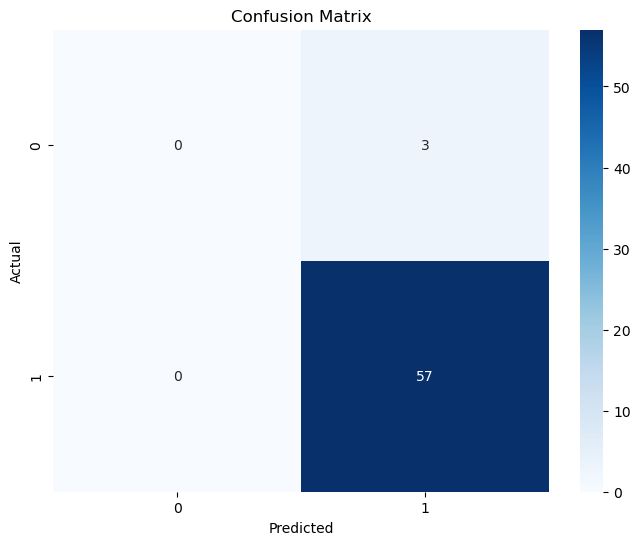


Model Coefficients:
                      Feature  Coefficient
2             Parental_income     0.979151
0             High_school_GPA     0.776493
4   Entrance_test_performance     0.769849
3      Hours_studied_per_week     0.571251
5       Distance_from_college     0.559844
6       Internet_availability     0.261790
1  Extracurricular_activities     0.244499
Intercept: 4.956686807390895

Interpretation of Coefficients:
- An increase in High_school_GPA increases the log-odds of passing by 0.776493
- An increase in Extracurricular_activities increases the log-odds of passing by 0.244499
- An increase in Parental_income increases the log-odds of passing by 0.979151
- An increase in Hours_studied_per_week increases the log-odds of passing by 0.571251
- An increase in Entrance_test_performance increases the log-odds of passing by 0.769849
- An increase in Distance_from_college increases the log-odds of passing by 0.559844
- An increase in Internet_availability increases the log-odds of 

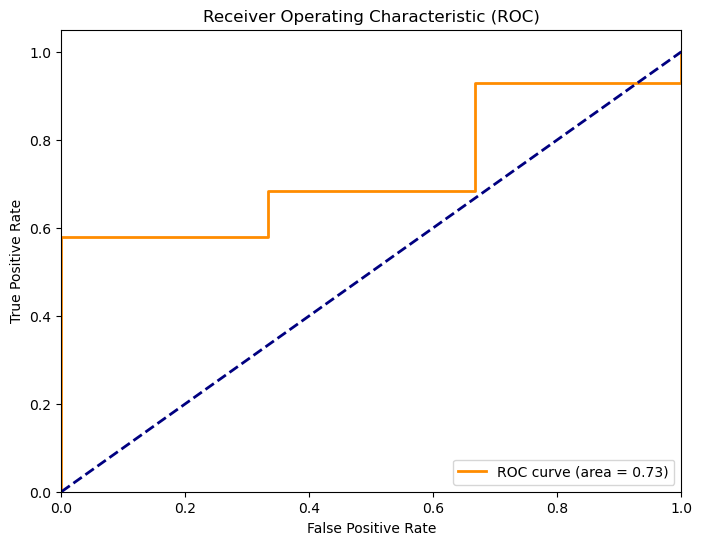


Model Conclusion:
The Logistic Regression model provides a statistical approach to predict student outcomes
based on their academic and personal characteristics. This model can help the university
identify students who might need additional support to succeed.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Create a synthetic dataset (since we don't have the actual data)
def create_sample_data(n_samples=200):
    # Generate synthetic data
    high_school_gpa = np.random.uniform(2.0, 4.0, n_samples)
    extracurricular_activities = np.random.randint(0, 6, n_samples)
    parental_income = np.random.uniform(20000, 120000, n_samples)
    hours_studied_per_week = np.random.uniform(5, 30, n_samples)
    entrance_test_performance = np.random.uniform(50, 100, n_samples)
    distance_from_college = np.random.uniform(0, 50, n_samples)
    internet_availability = np.random.choice([0, 1], n_samples, p=[0.2, 0.8])
    
    # Create a DataFrame
    data = pd.DataFrame({
        'High_school_GPA': high_school_gpa,
        'Extracurricular_activities': extracurricular_activities,
        'Parental_income': parental_income,
        'Hours_studied_per_week': hours_studied_per_week,
        'Entrance_test_performance': entrance_test_performance,
        'Distance_from_college': distance_from_college,
        'Internet_availability': internet_availability
    })
    
    # Generate the target variable based on a combination of features
    # Higher probability of passing with higher GPA, more activities, more study hours, better test performance
    # Lower probability with greater distance from college
    z = (0.8 * high_school_gpa + 
         0.3 * extracurricular_activities + 
         0.0001 * parental_income + 
         0.05 * hours_studied_per_week + 
         0.02 * entrance_test_performance - 
         0.03 * distance_from_college + 
         0.2 * internet_availability - 6)
    
    # Apply sigmoid function to get probabilities
    prob = 1 / (1 + np.exp(-z))
    
    # Generate binary outcome (Pass/Fail)
    final_year_result = np.random.binomial(1, prob)
    data['Final_year_result'] = final_year_result
    
    return data

# Create the dataset
student_data = create_sample_data(200)

# Display the first few rows of the data
print("Sample data:")
print(student_data.head())

# Data summary
print("\nData summary:")
print(student_data.describe())

# Check for missing values
print("\nMissing values:")
print(student_data.isnull().sum())

# Analyze the target variable distribution
print("\nTarget variable distribution:")
print(student_data['Final_year_result'].value_counts())
print(student_data['Final_year_result'].value_counts(normalize=True) * 100)

# Visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(student_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

# Split the data into features and target
X = student_data.drop('Final_year_result', axis=1)
y = student_data['Final_year_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
print("\nModel Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Calculate the intercept value
print(f"Intercept: {log_reg.intercept_[0]}")

# Interpret the coefficients (log-odds)
print("\nInterpretation of Coefficients:")
for index, row in coefficients.iterrows():
    if row['Coefficient'] > 0:
        print(f"- An increase in {row['Feature']} increases the log-odds of passing by {row['Coefficient']:.6f}")
    else:
        print(f"- An increase in {row['Feature']} decreases the log-odds of passing by {abs(row['Coefficient']):.6f}")

# Compare with Decision Tree (as mentioned in the task)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_pred = dt_classifier.predict(X_test_scaled)
print("\nDecision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

# Feature importance in Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
})
print("\nDecision Tree Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Make predictions on new data examples
def predict_student_outcome(student_features):
    # Convert to array and scale
    features_array = np.array(student_features).reshape(1, -1)
    features_scaled = scaler.transform(features_array)
    
    # Predict probability
    prob = log_reg.predict_proba(features_scaled)[0, 1]
    outcome = log_reg.predict(features_scaled)[0]
    
    return outcome, prob

# Example student profiles
print("\nPredicting outcomes for example student profiles:")

# High performing student
high_performer = [3.8, 3, 60000, 20, 90, 5, 1]  # High GPA, activities, study hours, etc.
outcome, prob = predict_student_outcome(high_performer)
print(f"High performing student: Predicted outcome = {'Pass' if outcome==1 else 'Fail'}, Probability = {prob:.4f}")

# Low performing student
low_performer = [2.5, 1, 25000, 8, 60, 30, 0]  # Lower GPA, fewer activities, etc.
outcome, prob = predict_student_outcome(low_performer)
print(f"Low performing student: Predicted outcome = {'Pass' if outcome==1 else 'Fail'}, Probability = {prob:.4f}")

# Borderline case
borderline = [3.2, 2, 45000, 15, 75, 15, 1]  # Middle values
outcome, prob = predict_student_outcome(borderline)
print(f"Borderline student: Predicted outcome = {'Pass' if outcome==1 else 'Fail'}, Probability = {prob:.4f}")

# ROC Curve for model evaluation
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Conclusion
print("\nModel Conclusion:")
print("The Logistic Regression model provides a statistical approach to predict student outcomes")
print("based on their academic and personal characteristics. This model can help the university")
print("identify students who might need additional support to succeed.")
